#### Pull data from database using SQL query. 

In [2]:
import pyodbc
import pandas as pd

# databaseConnection = 'DRIVER={SQL Server}; SERVER=ServerName; Database=DatbaseName; UID=UserId; PWD=password;'
connection = pyodbc.connect('DRIVER={SQL Server};SERVER=WINDOWS-A6S01I2\SQLEXPRESS;DATABASE=ASU_Professor_Salary;Trusted_Connection=yes;')
cursor = connection.cursor()

ASU_Dept_Query = '''
select
		Y18.Department_Description
		,Y12.Salary/1000000 as _2012
		,Y13.Salary/1000000 as _2013
		,Y14.Salary/1000000 as _2014
		,Y15.Salary/1000000 as _2015
		,Y16.Salary/1000000 as _2016
		,Y17.Salary/1000000 as _2017
		,Y18.Salary/1000000 as _2018
		
	from (select [Department_Description]  --subselect groups departments that existed in the 2018 dataset
		  ,sum([Salary]) as Salary
		  from [dbo].[ASU Employee Salary Data - 2018]
		  group by [Department_Description]) as Y18
		
		inner join (select [Department_Description] --departments that existed in 2012 are grouped and joined
			         ,sum([Salary]) as Salary
		             from [dbo].[ASU Employee Salary Data - 2012]
		             group by [Department_Description]) as Y12 
					 on Y12.[Department_Description] = Y18.[Department_Description]
		inner join (select [Department_Description] --departments that existed in 2012 are grouped and joined
			         ,sum([Salary]) as Salary
		             from [dbo].[ASU Employee Salary Data - 2013]
		             group by [Department_Description]) as Y13
					 on Y13.[Department_Description] = Y18.[Department_Description]
		inner join (select [Department_Description] --departments that existed in 2012 are grouped and joined
			         ,sum([Salary]) as Salary
		             from [dbo].[ASU Employee Salary Data - 2014]
		             group by [Department_Description]) as Y14 
					 on Y14.[Department_Description] = Y18.[Department_Description]
		inner join (select [Department_Description] --departments that existed in 2012 are grouped and joined
			         ,sum([Salary]) as Salary
		             from [dbo].[ASU Employee Salary Data - 2015]
		             group by [Department_Description]) as Y15
					 on Y15.[Department_Description] = Y18.[Department_Description]
		inner join (select [Department_Description] --departments that existed in 2012 are grouped and joined
			         ,sum([Salary]) as Salary
		             from [dbo].[ASU Employee Salary Data - 2016]
		             group by [Department_Description]) as Y16
					 on Y16.[Department_Description] = Y18.[Department_Description]
		inner join (select [Department_Description] --departments that existed in 2012 are grouped and joined
			         ,sum([Salary]) as Salary
		             from [dbo].[ASU Employee Salary Data - 2017]
		             group by [Department_Description]) as Y17
					 on Y17.[Department_Description] = Y18.[Department_Description]

	order by Y18.Salary desc

  '''
# save the sql query to a pandas dataframe
ASU_Dept_Data = pd.read_sql(ASU_Dept_Query, connection)
connection.close()
ASU_Dept_Data.head()

,Department_Description,_2012,_2013,_2014,_2015,_2016,_2017,_2018
0,SDA Administration,15.2781,16.3588,19.4425,21.2002,24.2752,23.2735,24.1613
1,School Of Earth & Space Explor,8.5169,10.0988,11.1384,11.1434,12.2868,12.4024,14.6135
2,Sch Elect Comptr & Energy Engr,9.7694,10.3102,10.3109,11.8311,12.4207,12.6697,13.8897
3,College Of Law,11.4501,11.2978,12.2626,12.1937,12.8743,12.7132,13.4206
4,Sols Administration & Faculty,11.8561,12.2137,12.6630,12.4115,12.0296,12.0518,13.2895


#### Transpose dataframe and graph top 7 ASU departments by salary spending.  SDA Administration is in a league of its own.

In [10]:
# misc cleaning
ASU_Dept_Data_Trans = ASU_Dept_Data.set_index('Department_Description').transpose() #rotate years to be the index
ASU_Dept_Data_Trans.index = ASU_Dept_Data_Trans.index.str.replace('_','') #remove underscore from attribute 'years' these were necessary to perform the SQL query
ASU_Dept_Data_Trans.head()

Department_Description,SDA Administration,School Of Earth & Space Explor,Sch Elect Comptr & Energy Engr,College Of Law,Sols Administration & Faculty,Sch Compt Infor & Dec Sys Engr,Sch Engr Matter Trnsprt Energy,School of Math & Stat Sciences,English,Psychology,...,ASUHS Operations Lead,MTBI,ASUP Police Department,"Noble Lib Serv, Govt Info",University Staff Council,SDA Aquatic Complex,AISSS West,Program Metabolic Biology,DPC Information Desk,Rocky Mountain Math Consortium
2012,15.2781,8.5169,9.7694,11.4501,11.8561,8.1784,8.3544,8.4359,8.8071,7.9207,...,0.3216,0.0374,0.0358,0.5846,0.0234,0.0300,0.0195,0.2571,0.0150,0.0198
2013,16.3588,10.0988,10.3102,11.2978,12.2137,8.9291,8.7624,9.2727,9.5977,9.2850,...,0.3317,0.0383,0.0376,0.6499,0.0241,0.0307,0.0201,0.2014,0.0156,0.0198
2014,19.4425,11.1384,10.3109,12.2626,12.6630,9.9195,10.2322,9.4554,10.5326,9.7961,...,0.1857,0.0397,0.0387,0.5574,0.0247,0.0313,0.0253,0.2048,0.0193,0.0203
2015,21.2002,11.1434,11.8311,12.1937,12.4115,10.0621,10.3152,10.1713,10.8944,8.9437,...,0.1452,0.0397,0.0387,0.5862,0.0247,0.0313,0.0529,0.0907,0.0193,0.0203
2016,24.2752,12.2868,12.4207,12.8743,12.0296,10.3261,11.1591,10.6488,11.1700,9.0830,...,0.1918,0.0360,0.0394,0.5294,0.0336,0.0323,0.0268,0.0927,0.0224,0.0210


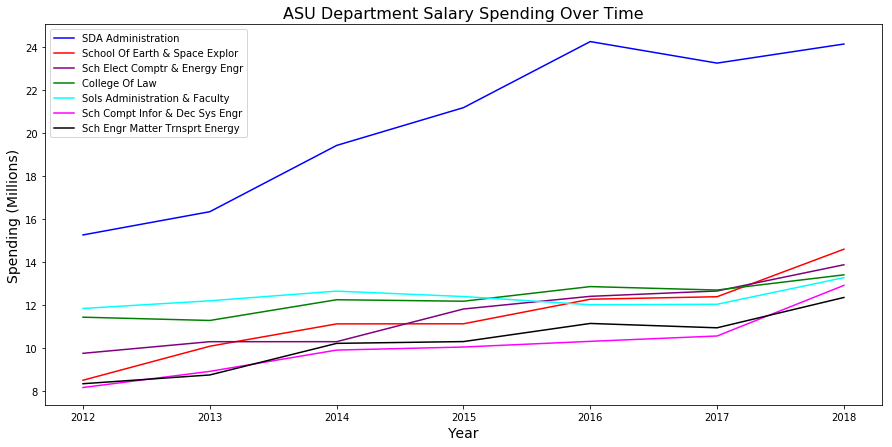

In [9]:
#plot the top 7 ASU departments by salary spending
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [15, 7]    #sets the ploted size
plt.title("ASU Department Salary Spending Over Time",fontsize=16)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Spending (Millions)",fontsize=14)

y1 = ASU_Dept_Data_Trans.iloc[:,0]
y2 = ASU_Dept_Data_Trans.iloc[:,1]
y3 = ASU_Dept_Data_Trans.iloc[:,2]
y4 = ASU_Dept_Data_Trans.iloc[:,3]
y5 = ASU_Dept_Data_Trans.iloc[:,4]
y6 = ASU_Dept_Data_Trans.iloc[:,5]
y7 = ASU_Dept_Data_Trans.iloc[:,6]

x = ASU_Dept_Data_Trans.index

plt.plot(x, y1, color='blue')
plt.plot(x, y2, color='red')
plt.plot(x, y3, color='purple')
plt.plot(x, y4, color='green')
plt.plot(x, y5, color='cyan')
plt.plot(x, y6, color='magenta')
plt.plot(x, y7, color='black')
plt.legend()

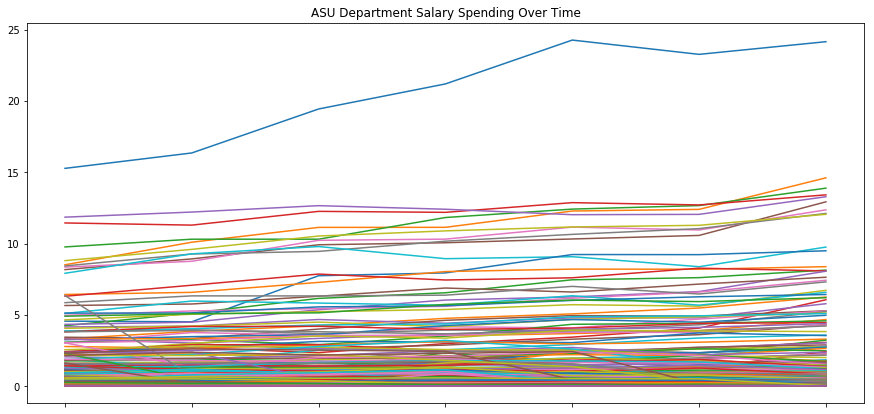

In [5]:
#graph all ASU departments by salary

fig, ax = plt.subplots(figsize=(15,7))

ASU_Dept_Data_Trans.plot(ax=ax, title="ASU Department Salary Spending Over Time")

ax.get_legend().remove()
